In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import power_transform
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection  import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# -------Train data set--------

In [2]:
df = pd.read_excel("Final_Train.xlsx")

In [3]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


# EDA

In [4]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

Target variable is of type int

In [5]:
df.shape

(5961, 7)

We have 5961 rows and 7 columns

In [6]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

Null values are present in Rating, Place, Miscellaneous_Info

In [7]:
df['Qualification'].value_counts()

BDS                                                                                                          488
BHMS                                                                                                         477
BAMS                                                                                                         471
MBBS                                                                                                         334
MBBS, MS - ENT                                                                                               220
                                                                                                            ... 
MD - Dermatology , Venereology & Leprosy, MBBS, MD - Dermatology, Certificate in Aesthetic Medicine            1
DNB - Dermatology & Venereology, DVD, MBBS                                                                     1
MBBS, DVD, DNB - Dermatology & Venereology                                                      

In Qualification many rows have common degrees like MBBS, BDS etc

In [8]:
df['Qualification'].value_counts()[:30]

BDS                                                      488
BHMS                                                     477
BAMS                                                     471
MBBS                                                     334
MBBS, MS - ENT                                           220
MBBS, MD - Dermatology                                   178
MBBS, MD - General Medicine                              177
MBBS, MD - Dermatology , Venereology & Leprosy           140
BHMS, MD - Homeopathy                                     93
MBBS, DDVL                                                92
MBBS, Diploma in Otorhinolaryngology (DLO)                84
BAMS, MD - Ayurveda Medicine                              82
BDS, MDS - Conservative Dentistry & Endodontics           68
MBBS, DDV                                                 66
BDS, MDS                                                  63
BDS, MDS - Oral & Maxillofacial Surgery                   57
MD - Dermatology , Vener

Top 30 rows of qualification have these top 10 degrees MBBS,BDS,BAMS,MD,BHMS,Fellowship,DLO,MLO,DNB,DDVL,MS in common

# Splitting the qualification column into multiple degree wise columns

In [9]:
df["Qualification"]=df["Qualification"].str.split(",")
Qualification ={}
for qual in df["Qualification"].values:
    for value in qual:
        value = value.strip()
        if value in Qualification:
            Qualification[value]+=1
        else:
            Qualification[value]=1

In [10]:
top10 = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qual = []
for i in top10:
    final_qual.append(i[0])
    
print(final_qual)

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [11]:
for i in final_qual:
    df[i] = int(0)

for x,y in zip(df['Qualification'].values, np.array([i for i in range(len(df))])):
    for i in x:
        i = i.strip()
        if i in final_qual:
            df[i][y] = int(1)

In [12]:
df.drop(['Qualification'],axis=1,inplace=True)


# Spliting Place into Area and city

In [13]:
df['Place']=df['Place'].fillna(df['Place'].mode()[0].strip())
new = df["Place"].str.split(", ", n = 1, expand = True)
df["Area"]= new[0]
df["City"]= new[1]

In [14]:
df.drop(['Place'],axis=1,inplace=True)

# Getting required data from Experience

In [15]:
new = df["Experience"].str.split(" ", n = 1, expand = True)
df["Experience"]= new[0]

In [16]:
df.drop(['Miscellaneous_Info'],axis=1,inplace=True)

In [17]:
df.head()

,Experience,Rating,Profile,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,Area,City
0,24,100%,Homeopath,100,0,0,0,1,0,0,0,0,0,1,Kakkanad,Ernakulam
1,12,98%,Ayurveda,350,0,0,1,0,0,0,0,0,0,0,Whitefield,Bangalore
2,9,NaN,ENT Specialist,300,1,0,0,0,0,0,0,0,0,0,Mathikere - BEL,Bangalore
3,12,NaN,Ayurveda,250,0,0,1,0,0,0,0,0,0,0,Bannerghatta Road,Bangalore
4,20,100%,Ayurveda,250,0,0,1,0,0,0,0,0,0,0,Keelkattalai,Chennai


# Converting Rating into groups

In [18]:
df['Rating'].fillna('-1%',inplace=True)

In [19]:
df['Rating'] = df['Rating'].str.slice(stop=-1).astype(int)

In [20]:
bins = [-1,0,10,20,30,40,50,60,70,80,90,100]
labels = [int(i) for i in range(11)]
df['Rating'] = pd.cut(df['Rating'], bins=bins, labels=labels, include_lowest=True)

# Removing null values from Area and city

In [21]:

df['Area']=df['Area'].fillna(df['Area'].mode()[0].strip())
df['City']=df['City'].fillna(df['City'].mode()[0].strip())

# confirming removal of null values

In [22]:
df.isnull().sum()

Experience                              0
Rating                                  0
Profile                                 0
Fees                                    0
MBBS                                    0
BDS                                     0
BAMS                                    0
BHMS                                    0
MD - Dermatology                        0
MS - ENT                                0
Venereology & Leprosy                   0
MD - General Medicine                   0
Diploma in Otorhinolaryngology (DLO)    0
MD - Homeopathy                         0
Area                                    0
City                                    0
dtype: int64

In [23]:
df['Experience']=df['Experience'].astype(int)

<AxesSubplot:ylabel='Experience'>

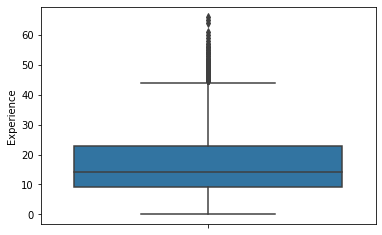

In [24]:
sns.boxplot(y='Experience',hue = 'Experience',data=df)

No Outliers are present in Experience

<AxesSubplot:ylabel='Fees'>

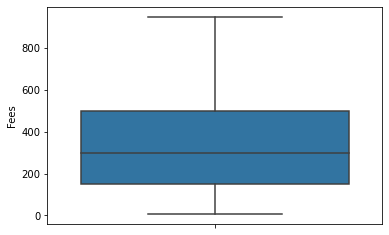

In [25]:
sns.boxplot(y='Fees',hue = 'Fees',data=df)

No outliers are present in Fees

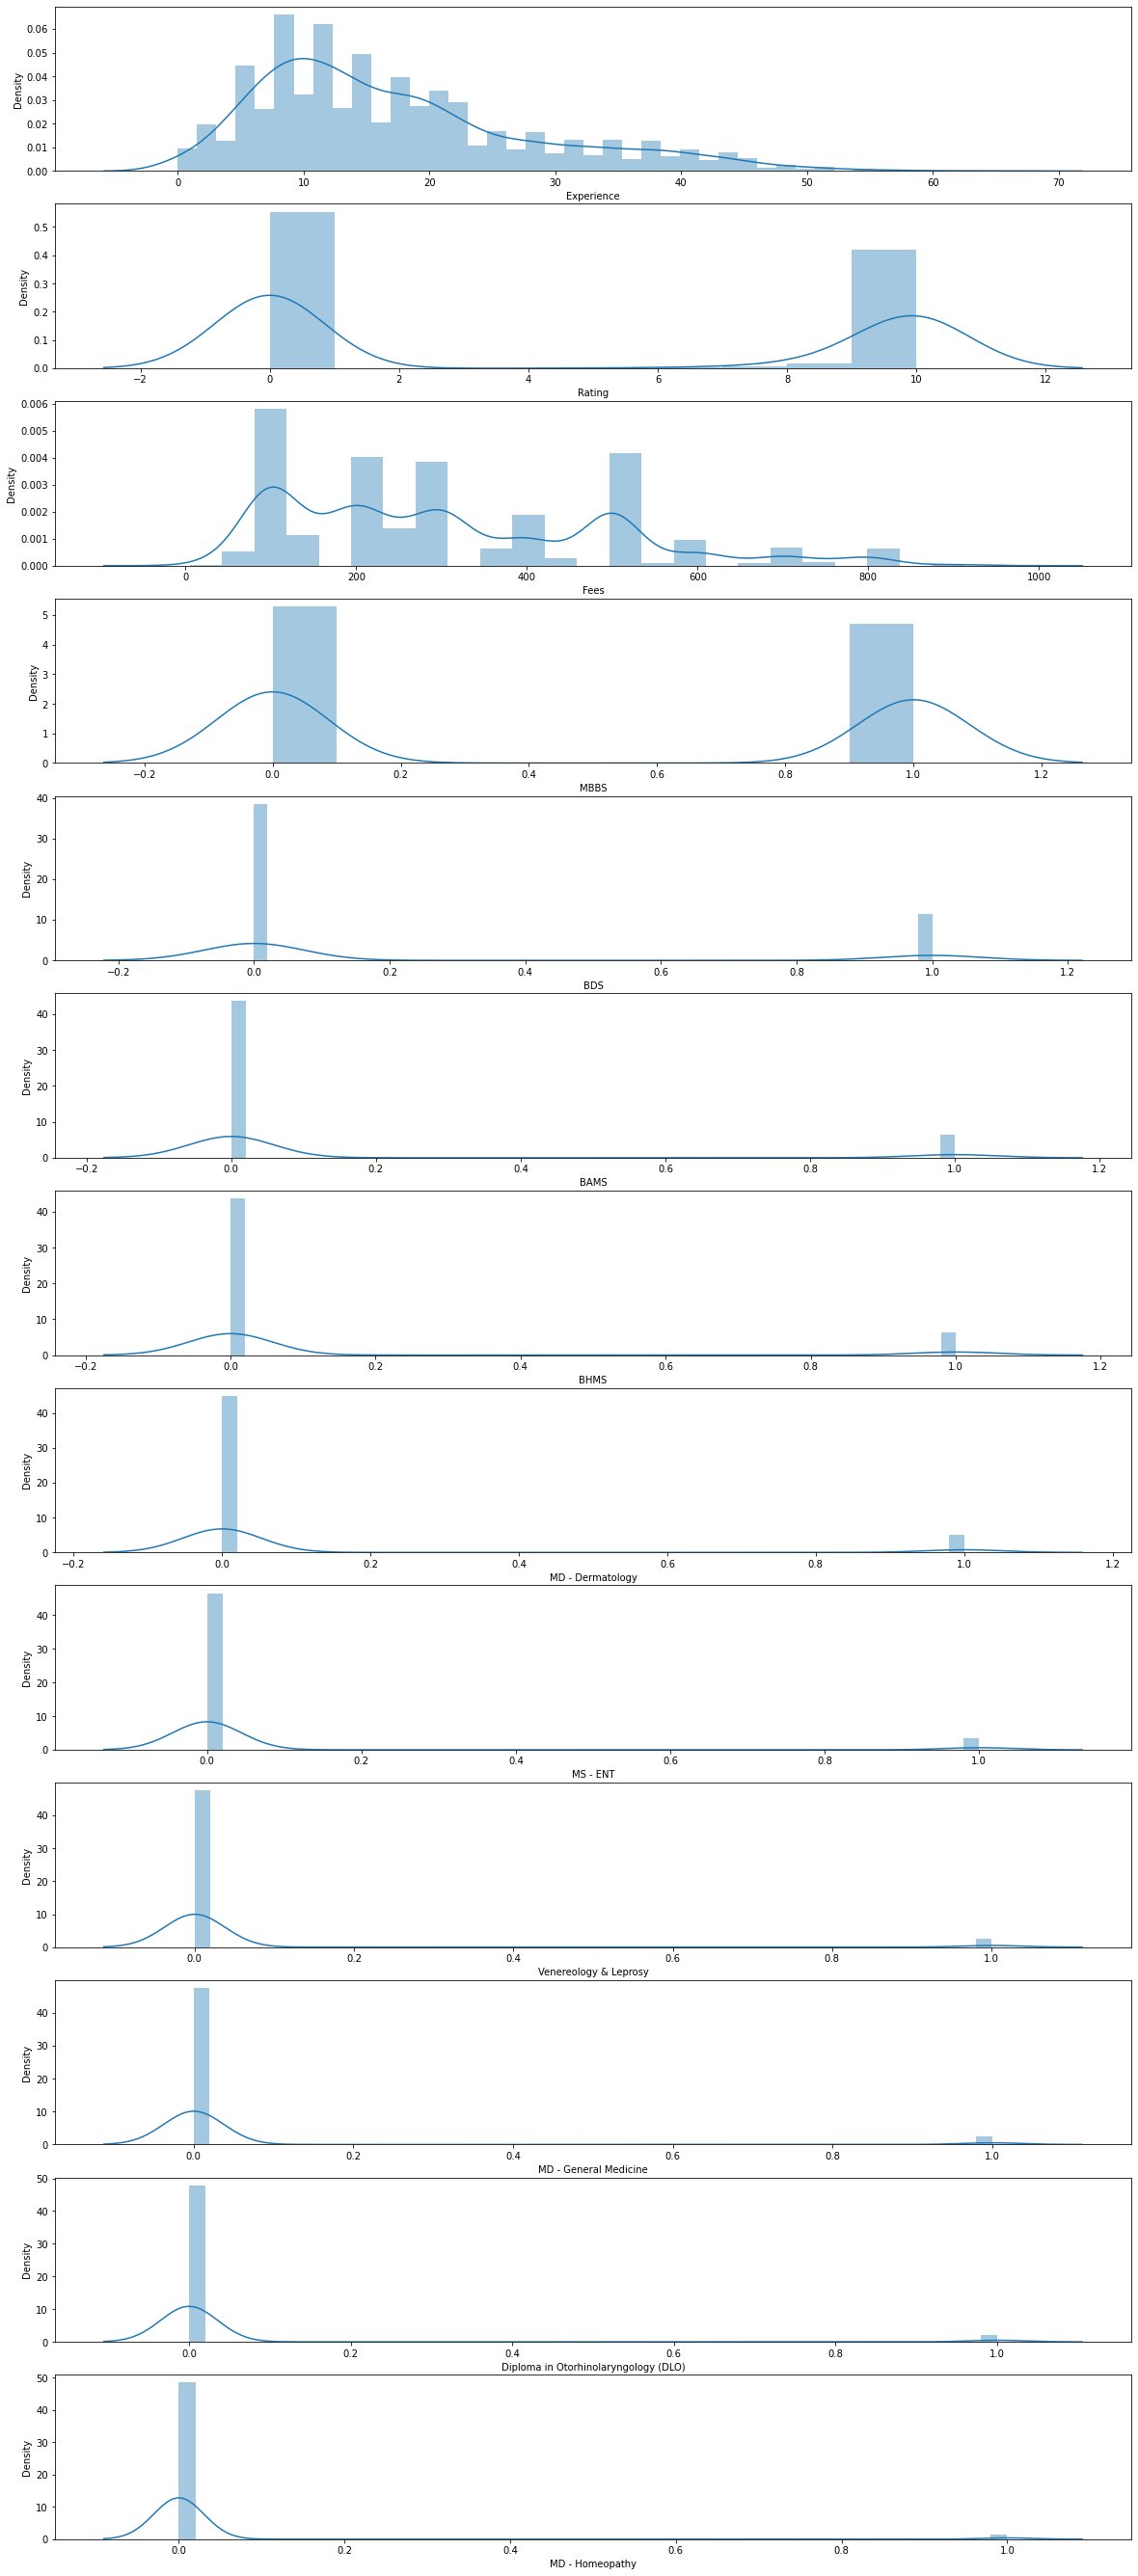

In [26]:

counter=1
plt.figure(figsize=(20,150))
columns =  ['Experience', 'Rating', 'Fees', 'MBBS', 'BDS', 'BAMS',
       'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy',
       'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)',
       'MD - Homeopathy']
counter=1;
for i in range(0,len(columns)):
        plt.subplot(40,1,counter)
        counter=counter+1
        sns.distplot(df[columns[i]])

    We can observe that Experience column in skewed
    WE can observe that Fees is not normally distributed
    Other columns have the data as 0 and 1

<AxesSubplot:>

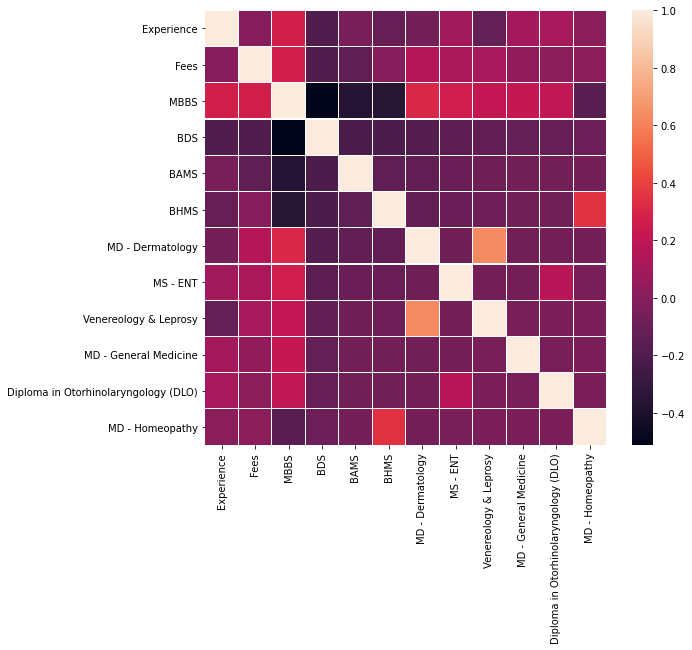

In [27]:
corrmat = df.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, linewidths = 0.1)

We can observe that 'venereology & Leprosy' and MD- Dermatology have a correlation. Other columns either have very week coorelation or no correlation

<AxesSubplot:xlabel='Fees', ylabel='Rating'>

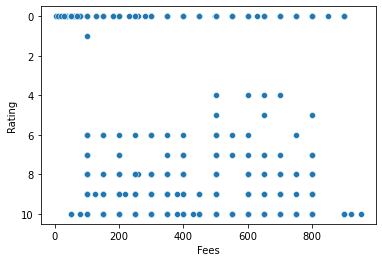

In [28]:
sns.scatterplot(x='Fees',y='Rating',data=df)

<AxesSubplot:xlabel='Fees', ylabel='Experience'>

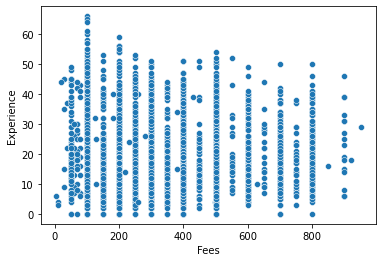

In [29]:
sns.scatterplot(x='Fees',y='Experience',data=df)

We can observe that fees with 800 values are very less

<AxesSubplot:xlabel='Fees', ylabel='count'>

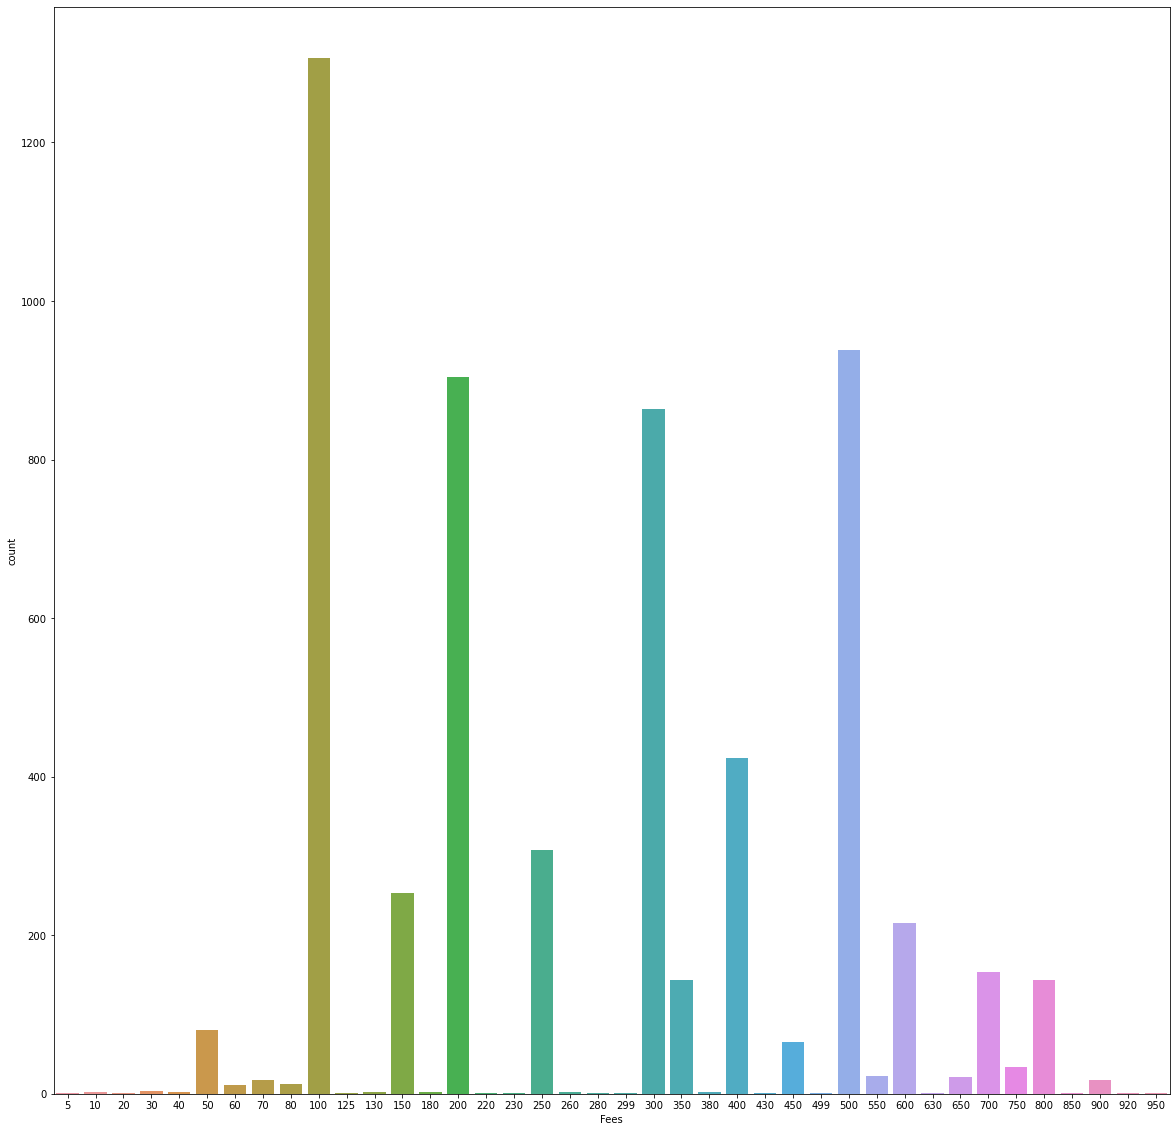

In [30]:
plt.figure(figsize=(20,20))
sns.countplot(x='Fees',data=df)

We can see that most of the doctors have fees as 100 and hihgest fees asked is 950

<AxesSubplot:xlabel='Rating', ylabel='count'>

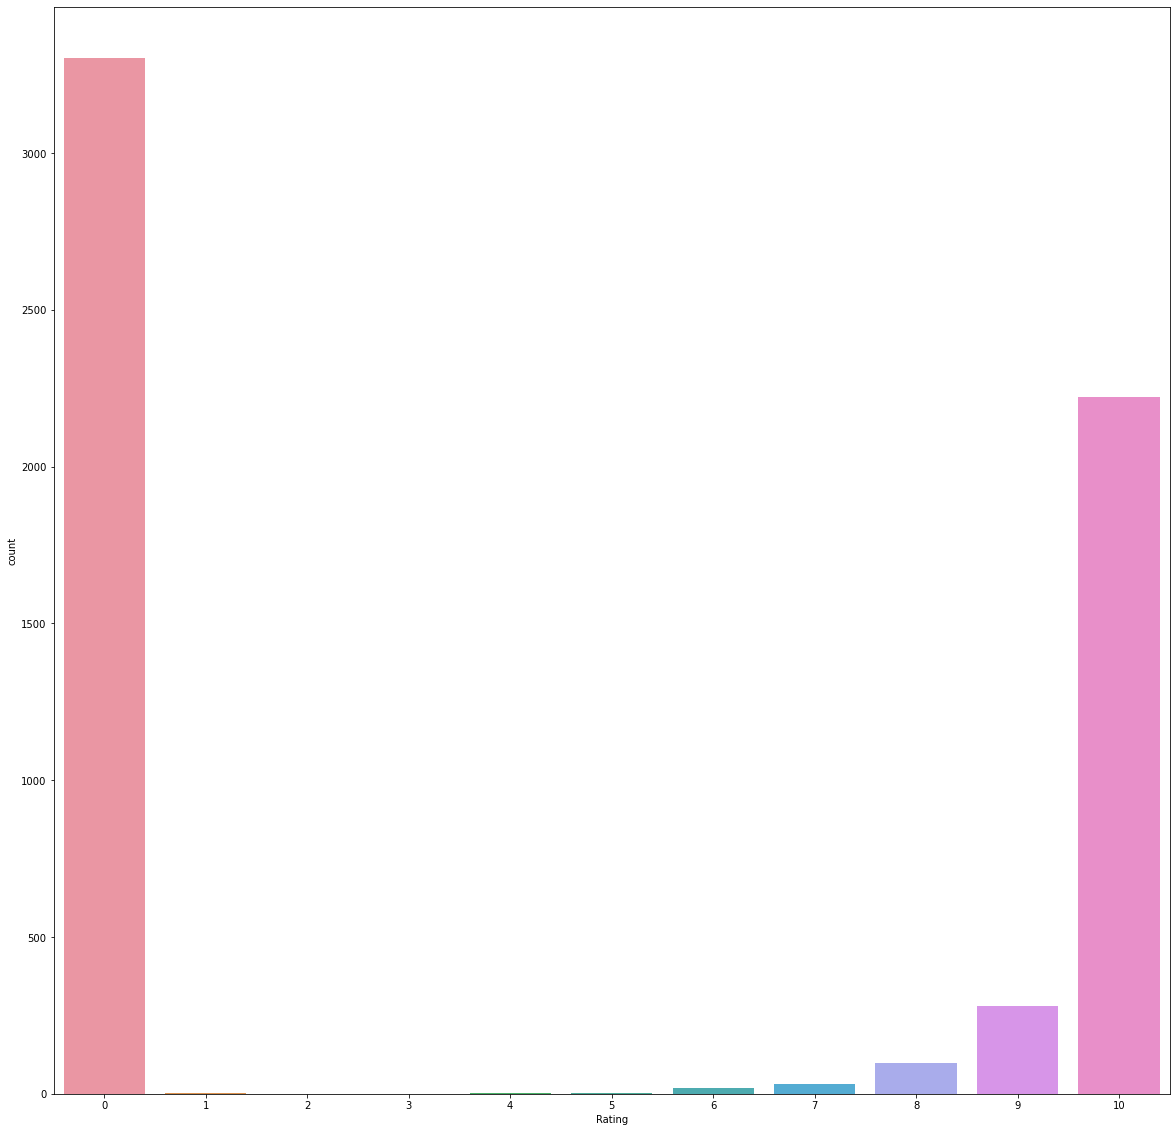

In [31]:
plt.figure(figsize=(20,20))
sns.countplot(x='Rating',data=df)

We can observe that most of the doctors does not have any rating (represented as 0), 
Highest provided the rating is 10 

<AxesSubplot:xlabel='Experience', ylabel='count'>

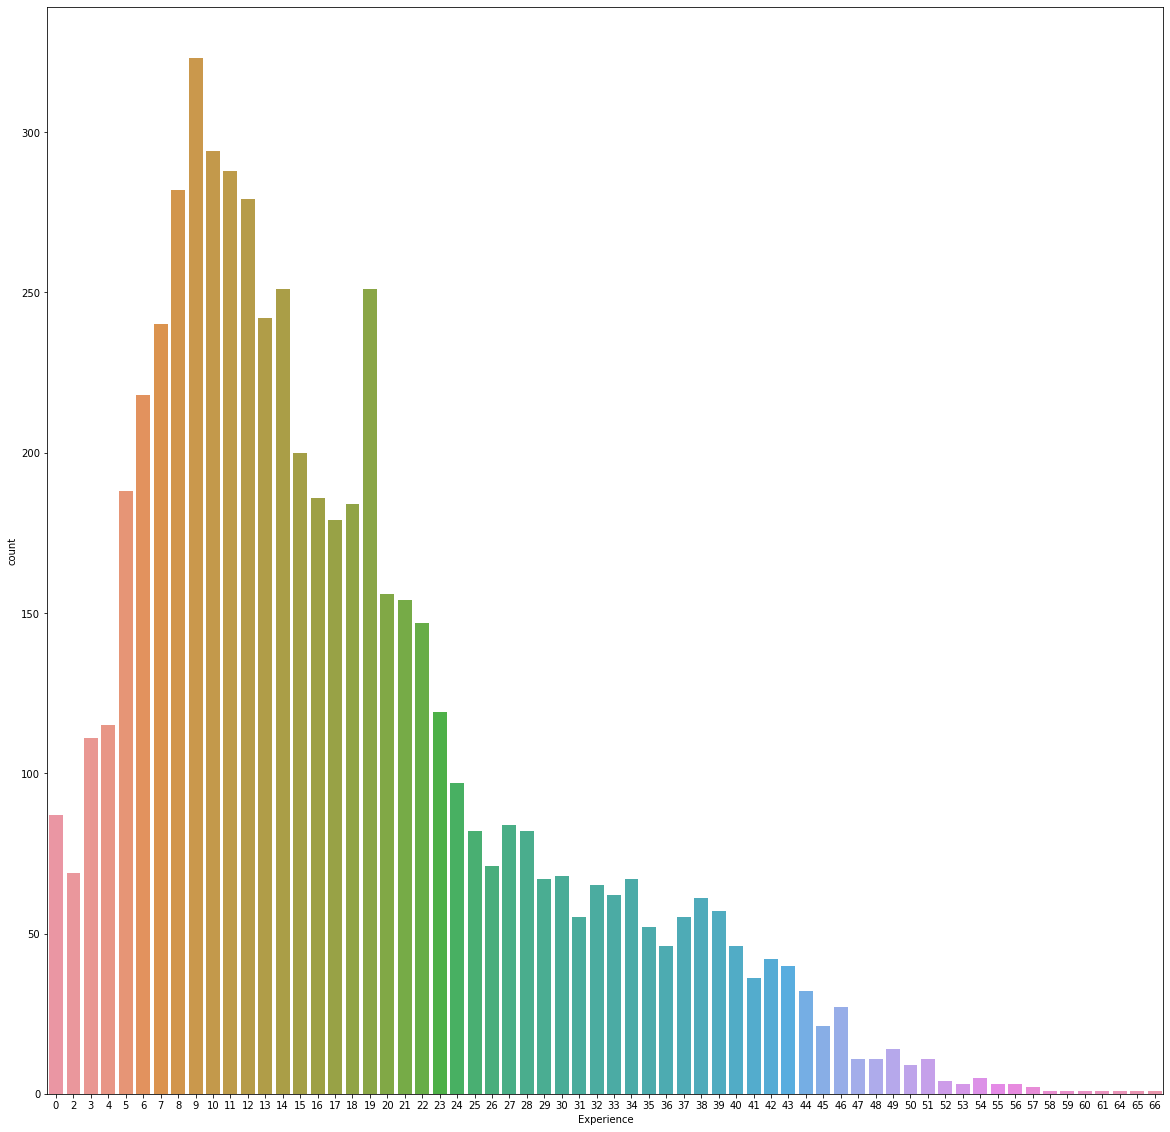

In [32]:
plt.figure(figsize=(20,20))
sns.countplot(x='Experience',data=df)

Most of the doctors have experience of 9 years

# Removing Outliers

In [33]:
columns =  ['Experience']
for col in columns:
    IQR = df[col].quantile(0.75)-df[col].quantile(0.25)
    Barmax =  df[col].quantile(0.75) + 1.5*IQR
    Barmin =  df[col].quantile(0.25) - 1.5*IQR
    df.loc[df[col]>Barmax,col] = Barmax
    df.loc[df[col]<Barmin,col] = Barmin

# Confirming Removal of Outliers

<AxesSubplot:ylabel='Experience'>

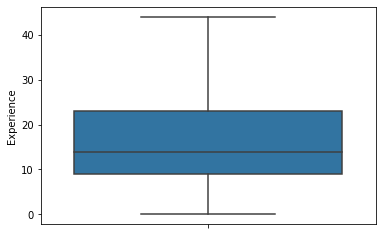

In [34]:
sns.boxplot(y='Experience', hue='Experience',data=df)

Outliers are removed

# Scaling the data

In [35]:
fin_df  = df.drop(["Profile",'Area','City','MBBS',
 'BDS',
 'BAMS',
 'BHMS',
 'MD - Dermatology',
 'MS - ENT',
 'Venereology & Leprosy',
 'MD - General Medicine',
 'Diploma in Otorhinolaryngology (DLO)',
 'MD - Homeopathy','Fees'],axis=1) #dropping the converted object type variables/ target variable
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(fin_df)
final_df = pd.DataFrame(minmax_df, columns = fin_df.columns)

In [36]:
final_df.skew()

Experience    0.847515
Rating        0.240670
dtype: float64

Experience is skewed 

# Removing the skewness

In [37]:
fin_df_new=power_transform(final_df)
fin_df_new = pd.DataFrame(fin_df_new,columns=final_df.columns)

# Confirming the removal of skewness

In [38]:
fin_df_new.skew()

Experience    0.061977
Rating        0.226261
dtype: float64

In [39]:
fin_df_new = fin_df_new.join(df["Profile"])
fin_df_new = fin_df_new.join(df["Area"])
fin_df_new = fin_df_new.join(df["City"])
fin_df_new = fin_df_new.join(df["MBBS"])
fin_df_new = fin_df_new.join(df["BDS"])
fin_df_new = fin_df_new.join(df["BAMS"])
fin_df_new = fin_df_new.join(df["BHMS"])
fin_df_new = fin_df_new.join(df["MS - ENT"])
fin_df_new = fin_df_new.join(df["Venereology & Leprosy"])
fin_df_new = fin_df_new.join(df["Diploma in Otorhinolaryngology (DLO)"])
fin_df_new = fin_df_new.join(df["MD - Homeopathy"])
fin_df_new = fin_df_new.join(df["MD - General Medicine"])
fin_df_new = fin_df_new.join(df["Fees"])

In [40]:
fin_df_new.head()

,Experience,Rating,Profile,Area,City,MBBS,BDS,BAMS,BHMS,MS - ENT,Venereology & Leprosy,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,MD - General Medicine,Fees
0,0.799393,1.142611,Homeopath,Kakkanad,Ernakulam,0,0,0,1,0,0,0,1,0,100
1,-0.353423,1.142611,Ayurveda,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,350
2,-0.745432,-0.895705,ENT Specialist,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,300
3,-0.353423,-0.895705,Ayurveda,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,250
4,0.474366,1.142611,Ayurveda,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,250


# Labeling the String columns

In [41]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
fin_df_new['Profile'] =  LE.fit_transform(fin_df_new['Profile'])
fin_df_new['Area'] =  LE.fit_transform(fin_df_new['Area'])
fin_df_new['City'] =  LE.fit_transform(fin_df_new['City'])

# ------Test data set------

In [42]:
df2 = pd.read_excel("Final_Test.xlsx")

In [43]:
df2.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


Test dataset doesnot have target variable

In [44]:
df2.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

We have null values in Rating and Miscellaneous info and place

# Spliting the Qualification into multiple columns

In [45]:
for i in final_qual:
    df2[i] = int(0)

for x,y in zip(df2['Qualification'].values, np.array([i for i in range(len(df2))])):
    x = x.split(",")
    for i in x:
        i = i.strip()
        if i in final_qual:
            df2[i][y] = int(1)
            
df2.drop('Qualification',axis=1,inplace=True)


# Spliting the Place into Area and city

In [46]:
df2['Place']=df2['Place'].fillna(df2['Place'].mode()[0].strip())

In [47]:
new = df2["Place"].str.split(", ", n = 1, expand = True)
df2["Area"]= new[0]
df2["City"]= new[1]

In [48]:
df2.drop(['Place'],axis=1,inplace=True)

# Getting relevant info from Experience

In [49]:
new = df2["Experience"].str.split(" ", n = 1, expand = True)
df2["Experience"]= new[0]

In [50]:
df2.drop(['Miscellaneous_Info'],axis=1,inplace=True)

# Splitting rating into bins

In [51]:
df2['Rating'].fillna('-1%',inplace=True)
df2['Rating'] = df2['Rating'].str.slice(stop=-1).astype(int)
bins = [-1,0,10,20,30,40,50,60,70,80,90,100]
labels = [int(i) for i in range(11)]
df2['Rating'] = pd.cut(df2['Rating'], bins=bins, labels=labels, include_lowest=True)

In [52]:
df2['Experience']=df2['Experience'].astype(int)

In [53]:
df2.head()

,Experience,Rating,Profile,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,Area,City
0,35,0,General Medicine,1,0,0,0,0,0,0,0,0,0,Ghatkopar East,Mumbai
1,31,0,ENT Specialist,1,0,0,0,0,0,0,0,1,0,West Marredpally,Hyderabad
2,40,7,Dermatologists,1,0,0,0,0,0,0,0,0,0,KK Nagar,Chennai
3,0,0,Ayurveda,0,0,1,0,0,0,0,0,0,0,New Ashok Nagar,Delhi
4,16,10,Dentist,0,1,0,0,0,0,0,0,0,0,Kanakpura Road,Bangalore


# Removing outliers

In [54]:
columns =  ['Experience']
for col in columns:
    IQR = df2[col].quantile(0.75)-df2[col].quantile(0.25)
    Barmax =  df2[col].quantile(0.75) + 1.5*IQR
    Barmin =  df2[col].quantile(0.25) - 1.5*IQR
    df2.loc[df2[col]>Barmax,col] = Barmax
    df2.loc[df2[col]<Barmin,col] = Barmin

# Scaling the data

In [55]:
fin_df2  = df2.drop(["Profile",'Area','City','MBBS',
 'BDS',
 'BAMS',
 'BHMS',
 'MD - Dermatology',
 'MS - ENT',
 'Venereology & Leprosy',
 'MD - General Medicine',
 'Diploma in Otorhinolaryngology (DLO)',
 'MD - Homeopathy'],axis=1) #dropping the object type variables/ target variable
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(fin_df2)
final_df2 = pd.DataFrame(minmax_df, columns = fin_df2.columns)

# Removing the skewness

In [56]:
fin_df_new2=power_transform(final_df2)
fin_df_new2 = pd.DataFrame(fin_df_new2,columns=final_df2.columns)

In [57]:
fin_df_new2 = fin_df_new2.join(df2["Profile"])
fin_df_new2 = fin_df_new2.join(df2["Area"])
fin_df_new2 = fin_df_new2.join(df2["City"])
fin_df_new2 = fin_df_new2.join(df2["MBBS"])
fin_df_new2 = fin_df_new2.join(df2["BDS"])
fin_df_new2 = fin_df_new2.join(df2["BAMS"])
fin_df_new2 = fin_df_new2.join(df2["BHMS"])
fin_df_new2 = fin_df_new2.join(df2["MS - ENT"])
fin_df_new2 = fin_df_new2.join(df2["Venereology & Leprosy"])
fin_df_new2 = fin_df_new2.join(df2["Diploma in Otorhinolaryngology (DLO)"])
fin_df_new2 = fin_df_new2.join(df2["MD - Homeopathy"])
fin_df_new2 = fin_df_new2.join(df2["MD - General Medicine"])

# Labeling the data

In [58]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
fin_df_new2['Profile'] =  LE.fit_transform(fin_df_new2['Profile'])
fin_df_new2['Area'] =  LE.fit_transform(fin_df_new2['Area'])
fin_df_new2['City'] =  LE.fit_transform(fin_df_new2['City'])

# Train test 

In [59]:
x=fin_df_new.drop('Fees',axis=1)
y=fin_df_new['Fees']
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    regr = LinearRegression()
    regr.fit(x_train, y_train)
    pred=regr.predict(x_test)
    acc = r2_score(y_test, pred)
    if(acc>maxAccu):
        maxAccu=acc
        maxRS=i
print("Best R2 Score is",maxAccu,"on Random State",maxRS)


Best R2 Score is 0.1634520083571378 on Random State 108


In [60]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.30,random_state=108)

# Model building

-------Linear regression-------

In [61]:
from sklearn import metrics
lr=LinearRegression()
lr.fit(train_x,train_y)
y_pred = lr.predict(test_x)
print('MAE:', metrics.mean_absolute_error(test_y, y_pred))
print('MSE:', metrics.mean_squared_error(test_y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

MAE: 142.08361416336808
MSE: 31037.508145595242
RMSE: 176.17465239243484


-------Ridge-------

In [62]:
rr = Ridge(alpha=0.01)
rr.fit(train_x, train_y) 
predict= rr.predict(test_x)
print('MAE:', metrics.mean_absolute_error(test_y, predict))
print('MSE:', metrics.mean_squared_error(test_y, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y,predict)))

MAE: 142.08373378853665
MSE: 31037.53635904578
RMSE: 176.17473246480546


-------Lasso-------

In [63]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(train_x, train_y) 
pred_l= model_lasso.predict(test_x)
print('MAE:', metrics.mean_absolute_error(test_y, pred_l))
print('MSE:', metrics.mean_squared_error(test_y, pred_l))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y,pred_l)))

MAE: 142.0897561791505
MSE: 31039.41232458459
RMSE: 176.18005654609317


-------Elastic Net-------

In [64]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(train_x, train_y) 
pred_e= model_enet.predict(test_x)
print('MAE:', metrics.mean_absolute_error(test_y, pred_e))
print('MSE:', metrics.mean_squared_error(test_y, pred_e))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y,pred_e)))

MAE: 142.3436659901621
MSE: 31107.59381337553
RMSE: 176.3734498539265


-------Decision Tree-------

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
dtr=DecisionTreeRegressor()
dtr.fit(train_x,train_y)
pred=dtr.predict(test_x)
print('MAE:', metrics.mean_absolute_error(test_y, pred))
print('MSE:', metrics.mean_squared_error(test_y, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, pred)))

MAE: 164.68418110676356
MSE: 54315.17607602012
RMSE: 233.05616506760794


-------Random Forest-------

In [68]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(train_x,train_y)
pred1=rdr.predict(test_x)
print('MAE:', metrics.mean_absolute_error(test_y, pred1))
print('MSE:', metrics.mean_squared_error(test_y, pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y,pred1)))

MAE: 133.20541164257764
MSE: 30466.175611558418
RMSE: 174.54562615991964


 # Cross Validation Score

In [69]:
print("Cross validation score for linear regression:",cross_val_score(lr,x,y,scoring='neg_mean_absolute_error',cv=5).mean())

Cross validation score for linear regression: -143.49890423018172


In [70]:
print("Cross validation score for ridge:",cross_val_score(rr,x,y,scoring='neg_mean_absolute_error',cv=5).mean())

Cross validation score for ridge: -143.49896755598493


In [71]:
print("Cross validation score for lasso:",cross_val_score(model_lasso,x,y,scoring='neg_mean_absolute_error',cv=5).mean())

Cross validation score for lasso: -143.50457924581534


In [72]:
print("Cross validation score elastic net:",cross_val_score(model_enet,x,y,scoring='neg_mean_absolute_error',cv=5).mean())

Cross validation score elastic net: -143.66988530439858


In [73]:
print("Cross validation score Decision tree:",cross_val_score(dtr,x,y,scoring='neg_mean_absolute_error',cv=5).mean())

Cross validation score Decision tree: -170.0407376362112


In [74]:
print("Cross validation score Random forest:",cross_val_score(rdr,x,y,scoring='neg_mean_absolute_error',cv=5).mean())

Cross validation score Random forest: -134.57710891182506


We will select Random forest for the hypertuning

# Model Hypertuning

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
parameter = {
 'max_depth': [100, 400, 800],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 5],
 'n_estimators': [200, 400, 800]
}
GCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5)


In [77]:
GCV.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [100, 400, 800],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 400, 800]})

In [78]:
GCV.best_params_

{'max_depth': 800,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 800}

# Building Final Model

In [79]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor(max_depth= 800,
min_samples_leaf= 2,
min_samples_split= 5,
n_estimators= 800)
rdr.fit(train_x,train_y)
pred1=rdr.predict(test_x)
print('MAE:', metrics.mean_absolute_error(test_y, pred1))
print('MSE:', metrics.mean_squared_error(test_y, pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y,pred1)))

MAE: 130.88099375274095
MSE: 29070.277356629875
RMSE: 170.50008022470217


# Saving the model

In [80]:
import joblib
joblib.dump(rdr,"Doctor fees.pkl")


['Doctor fees.pkl']